# Meteorites Landing Data Analysis

1. Retrive the data by calling NASA api
2. Add Country Code, Country Name and City Name
3. Save the Meteorites Landing Data to fine "meteorites_landing_raw_data.csv" file for the cleaning process

In [3]:
#Dependencies
import csv
import requests
import pandas as pd
import json
import os
import matplotlib.pyplot as plt

In [ ]:
from meteorites_data_retriever import meteorites_data_retriever


In [ ]:
from meteorites_data_cleaner import meteorites_data_cleaner

### meteorites data retrieving process

In [ ]:
#meteorites_raw_data = meteorites_data_retriever()
#meteorites_data.head()


### meteorites data cleaning process




In [ ]:
#meteorites_data = meteorites_data_cleaner()


In [4]:
#Read server list from CSV file
meteorites_df = pd.read_csv('./Resources/meteorites_cleaned_data.csv')
meteorites_df.head()
#meteorites_df.count()

Unnamed: 0         31672
Unnamed: 0.1       31672
name               31672
id                 31672
mass               31672
fall               31672
reclat             31672
reclong            31672
geolocation        31672
country_code       31672
country_name       31672
city_name          31672
continent_name     31672
material_column    31672
years              31672
dtype: int64

### Plot meteorites fall density by continent_name

In [5]:
def plot_meteorites_fall_density():
    # Generate a pie plot showing the distribution of meteorites fall
    met_df = meteorites_df.groupby(["continent_name"]).count()
    met_df = met_df.reset_index()
    #Draw Pie chart
    mice_pie = met_df.plot.pie(y='id',labels=met_df['continent_name'], 
                               figsize=(5,5),autopct='%1.1f%%', title=("Meteorites fall Density Index")) 
    mice_pie.set_ylabel("Continent Name")

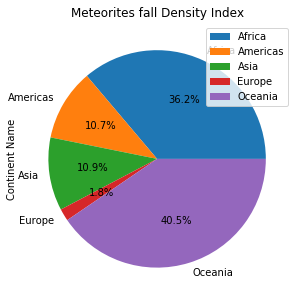

In [6]:
plot_meteorites_fall_density()

### Plot meteorites fall by year

In [7]:
def plot_meteorites_fall_by_year():
    #How many meteorites hit Earth each year?
    # Generate a bar plot showing number of data points for each treatment regimen using pandas

    meterorite_data = pd.DataFrame(meteorites_df, columns = ['id','years'])

    meterorite_data[['year', 'date']] = meterorite_data['years'].str.split("-", n = 1, expand = True)


    met_df = meterorite_data.groupby(["year"]).count()
    met_df.head(100)
    met_df = met_df.reset_index()
    met_df = met_df[met_df['year'] > '1950']


    met_df.plot.bar(x='year', y='id', facecolor="red", alpha=0.75, align="center", figsize=(20,5))
    plt.title("How many meteorites hit Earth each year")
    plt.xlabel('Drug Regimen')
    plt.ylabel('Tumor Volume (mm3)')
    plt.tight_layout()
    plt.show()

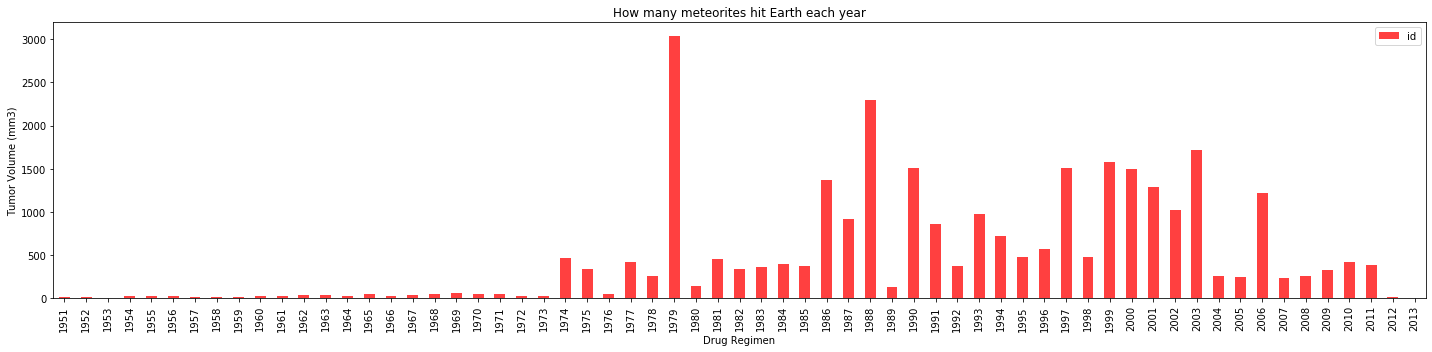

In [8]:
plot_meteorites_fall_by_year()

### Meteorites fall trend by year

In [9]:
#How many meteorites hit Earth each year?
def plot_meteorites_fall_by_year():
    meterorite_data = pd.DataFrame(meteorites_df, columns = ['id','years'])
    meterorite_data[['year', 'date']] = meterorite_data['years'].str.split("-", n = 1, expand = True)
    meterorite_data = meterorite_data[meterorite_data['year'] > '2000']
    met_df_year_count = meterorite_data.groupby(["year"])['id'].count()
    met_df_year_count = met_df_year_count.reset_index()
    plt.scatter(met_df_year_count.year, met_df_year_count.id, s=30, alpha=0.75)

    # Set a title for the chart
    plt.title("Meteorites fall trend by year")
    plt.xlabel("Year")
    plt.ylabel("Count")
    plt.show()
    plt.tight_layout()

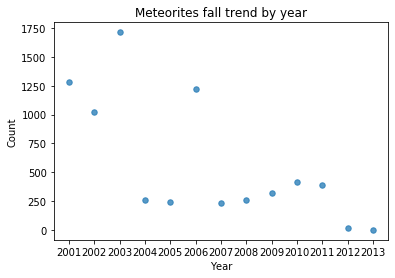

<Figure size 432x288 with 0 Axes>

In [10]:
plot_meteorites_fall_by_year()

### How many meteorites hit Earth each year by Location

In [17]:
#How many meteorites hit Earth each year by Location?
def plot_meteorites_fall_by_geography(meteorites_df):
    meterorite_data = pd.DataFrame(meteorites_df, columns = ['years','country_code'])
    meterorite_data['country_code2'] = meterorite_data['country_code'].str.split("-", n = 1, expand = True)
    met_df_geo_count = meterorite_data.groupby(["years"])['country_code'].count()
    met_df_geo_count = met_df_geo_count.reset_index()
    plt.scatter(met_df_geo_count.years, met_df_geo_count.country_code, s=30, alpha=0.75)

    # Set a title for the chart
    plt.title("Meteorites fall trend by geography")
    plt.xlabel("country_code")
    plt.ylabel("Count")
    plt.show()
    plt.tight_layout()

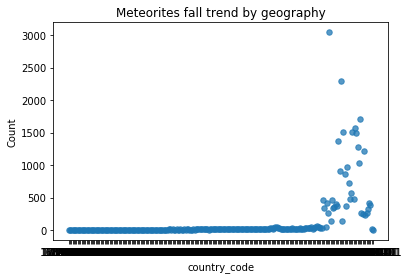

<Figure size 432x288 with 0 Axes>

In [18]:
plot_meteorites_fall_by_geography(meteorites_df)